# Face Age Detection using OpenCV

This Code Template is for Face Age Detection using Huggingface Vision Transformers and OpenCV in Python. The template uses CascadeClassifier to detect the face in the input and then uses the Huggingface model to predict the age.

### **Required Packages**

In [1]:
!pip install opencv-python matplotlib transformers ipywidgets

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from transformers import ViTFeatureExtractor, ViTForImageClassification

### Initialization

Path of the image to be loaded

In [3]:
#image path variable
img_path = 'group-photo.jpg'

Path for classifier xml file

In [4]:
filter_path = 'YOUR_PATH/' + 'haarcascade_frontalface_default.xml'

Init Vision Transformers

In [5]:
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

### Image Fetching

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. 

We use the the "**cv2.imread()**" method to load an image from the specified file path.

In [6]:
def plot_image(path):
    image = cv2.imread(path) 
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,12))
    plt.imshow(img) 
    plt.axis("off")
    plt.show()

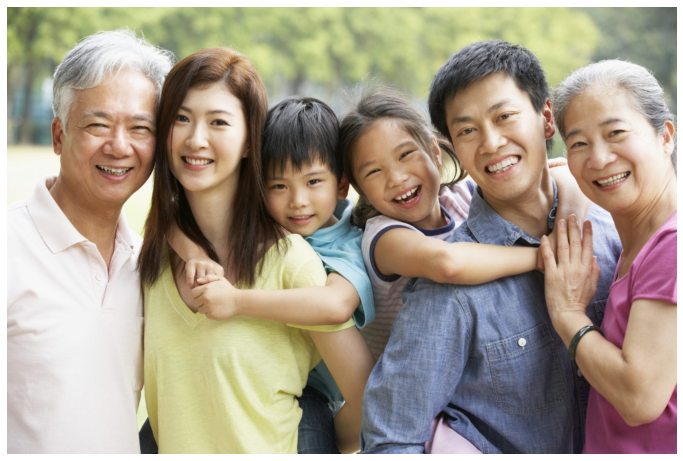

In [7]:
plot_image(img_path)

### Haar-cascade Classifier

Haar-cascade Classifier is a machine learning algorithm where we train a cascade function with tons of images. There are different types of cascade classifiers according to different target objects and here we will use a classifier that considers the human face to recognize it as the target object. 

You can find the the trained classifier XML file for face detection [here](https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml)

In [8]:
# load the haarcascade classifier xml file
face_cascade = cv2.CascadeClassifier(filter_path)

### Face Detection

For detecting faces in the image, we use the detectMultiScale() function. 

It detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles which can be then plotted around the faces.

#### Tuning Parameters
>**image** -	Matrix of the type CV_8U containing an image where objects are detected.

>**objects** - Vector of rectangles where each rectangle contains the detected object, the rectangles may be partially outside the original image.

>**scaleFactor** - Parameter specifying how much the image size is reduced at each image scale.

>**minNeighbors** - Parameter specifying how many neighbors each candidate rectangle should have to retain it.

For more details [click here](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498)

In [9]:
def face_detect(path):    
    img = cv2.imread(path)
    faces = face_cascade.detectMultiScale(image = img, scaleFactor = 1.1, minNeighbors = 10)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    print(len(faces),"faces detected!")

    finalimg = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.figure(figsize=(12,12))
    plt.imshow(finalimg) 
    plt.axis("off")
    plt.show()

In [10]:
def get_age_range(img):
    
    # Transform our image and pass it through the model
    inputs = transforms(img, return_tensors='pt')
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()

    # Predicted Classes
    preds = model.config.id2label[predicted_class_idx]

    return preds

In [11]:
def face_age_detect(path):    
    img = cv2.imread(path)
    faces = face_cascade.detectMultiScale(image = img, scaleFactor = 1.1, minNeighbors = 10)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        face = img[y:y + h, x:x + w]
        pred_age = get_age_range(face)
        cv2.putText(img, pred_age, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 125), 3)
    
    print(len(faces),"faces detected!")

    finalimg = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.figure(figsize=(12,12))
    plt.imshow(finalimg) 
    plt.axis("off")
    plt.show()

3 faces detected!


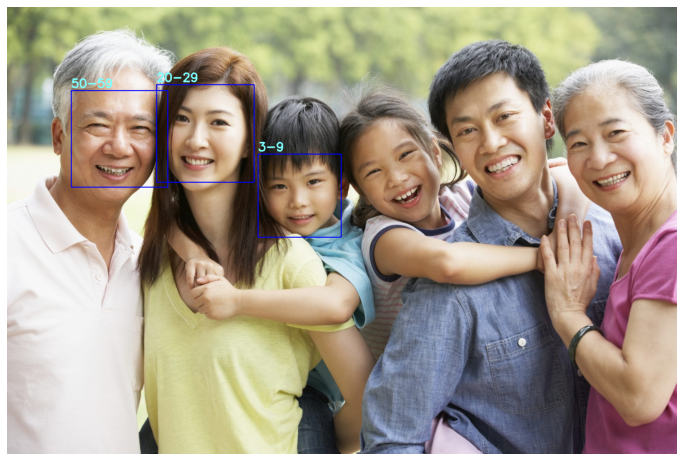

In [12]:
face_age_detect(img_path)

#### Creator: Sakares S. , Github: [Profile](https://github.com/sakares)